In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\ASUS VivoBook\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# 사용자 운영체제 확인
import os
os.name
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
df1 = pd.read_csv('소매업태별_판매액_경상지수.csv',index_col='Unnamed: 0')
df2 = pd.read_csv('소매업태별_판매액_불변지수.csv',index_col='Unnamed: 0')

- 경상지수는 월별로 조사한 상품판매액을 기준년도(5년마다 갱신)의 월평균 상품판매액으로 나누어 작성합니다.

- 불변지수는 경상지수를 디플레이터(소비자물가지수 이용)로 나누어 작성하며, 가격변동분을 제거하여 실질성장을 분석하는데 활용됩니다.

In [5]:
df1

,총지수,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,체인 슈퍼마켓,일반 슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,승용차 소매점,연료 소매점,전문소매점,가전·컴퓨터·통신기기 소매점,의복·신발·가방 소매점,음식·가정· 문화상품 소매점,의약품·화장품·기타상품 소매점,무점포 소매,인터넷 쇼핑,홈쇼핑,방문 및 배달 소매점
2013,95.6,103.0,103.4,74.3,95.4,93.5,96.7,71.0,98.1,72.1,122.0,100.9,109.3,NaN,NaN,NaN,84.4,73.9,94.5,107.7
2014,97.6,100.6,101.0,90.3,97.5,95.3,99.1,77.2,101.0,83.7,116.7,100.1,98.6,NaN,NaN,NaN,91.2,84.7,98.7,103.8
2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2016,103.9,103.1,101.4,133.5,102.1,103.4,101.3,118.4,98.7,103.3,94.6,101.2,100.2,102.5,98.5,103.3,115.5,124.1,110.7,94.9
2017,107.8,101.0,103.1,157.3,104.9,109.4,102.5,135.1,103.5,105.1,102.1,99.9,105.7,101.6,93.0,101.4,130.9,148.4,118.0,92.9
2018,113.9,103.2,102.1,206.1,106.9,114.8,102.7,148.3,111.2,112.0,110.5,100.4,106.4,105.3,90.2,101.9,150.3,178.8,130.1,87.3
2019,115.9,104.7,98.9,270.2,101.6,115.9,94.1,156.1,110.2,113.6,107.1,97.2,93.6,100.6,89.2,104.8,170.1,212.9,133.0,84.4
2020,116.4,94.3,103.1,168.6,106.9,125.1,97.3,161.2,114.7,133.9,97.1,87.6,89.4,77.8,89.0,95.9,211.3,282.3,143.5,77.7


In [6]:
df1['year']=df1.index
df2['year']=df2.index

In [7]:
def ts_plot(data,i):
    fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(18,4))
    ax[0].plot(data.iloc[:,i])
    ax[0].set_title(data.iloc[:,i].name)
    
    ax[1].plot(data.iloc[:,i+4])
    ax[1].set_title(data.iloc[:,i+4].name)
    
    ax[2].plot(data.iloc[:,i+8])
    ax[2].set_title(data.iloc[:,i+8].name)
    
    ax[3].plot(data.iloc[:,i+12])
    ax[3].set_title(data.iloc[:,i+12].name)

### 유통 업태별 불변지수

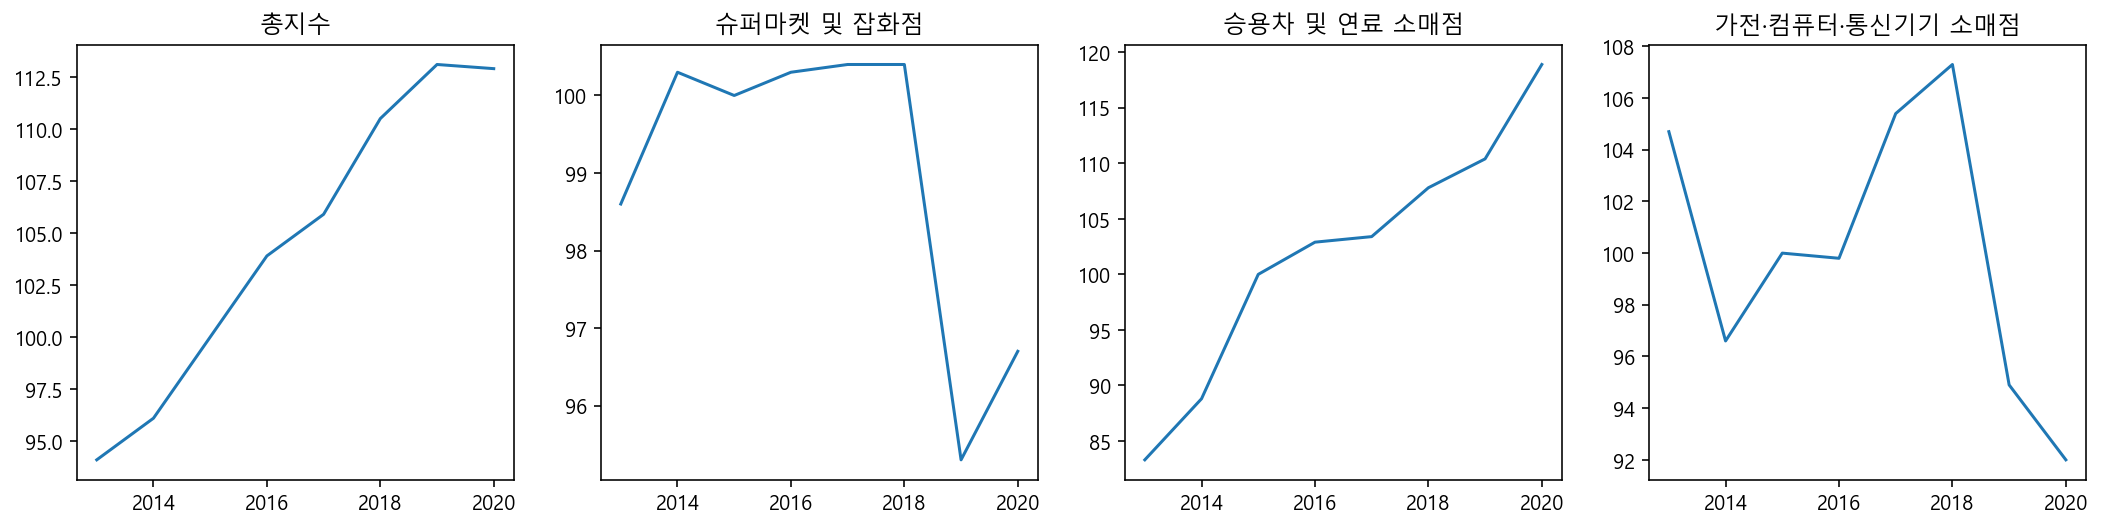

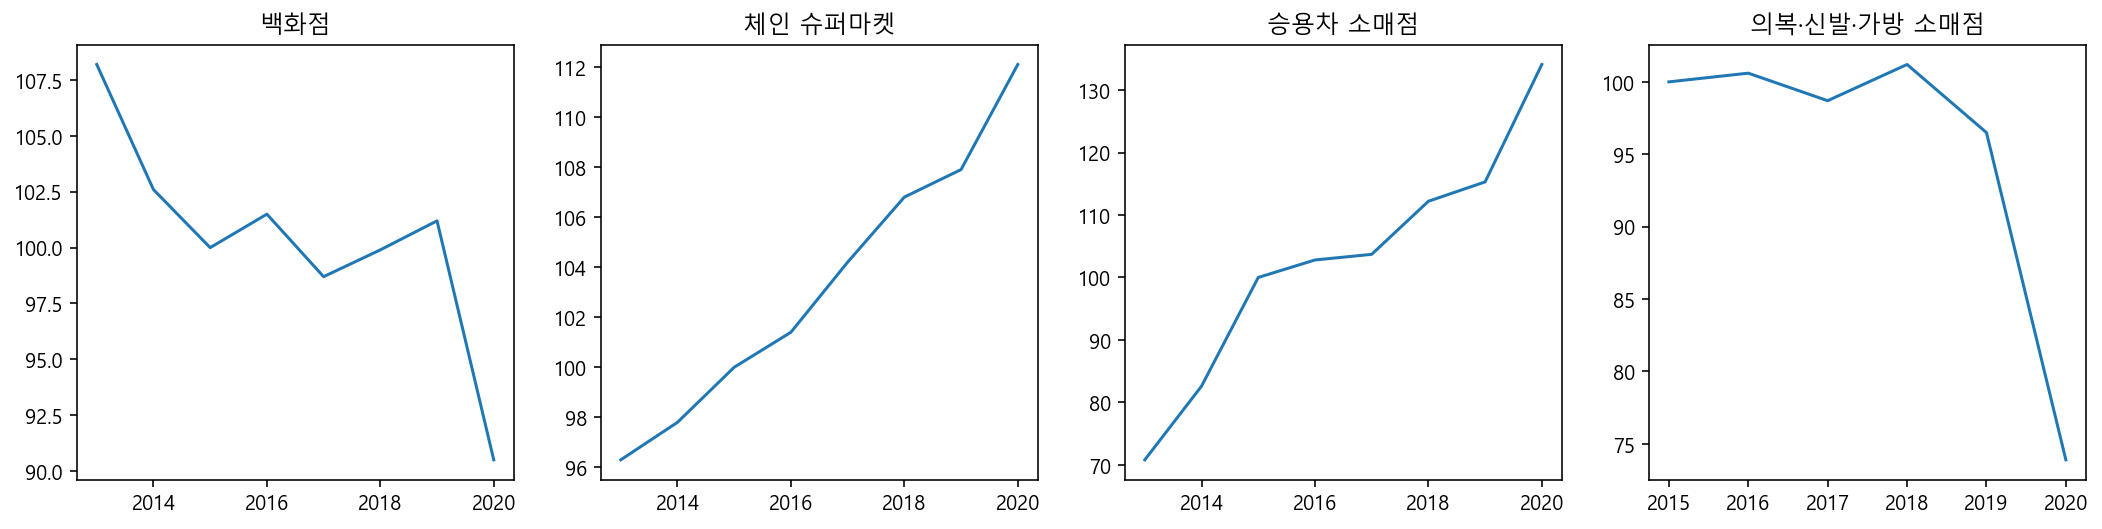

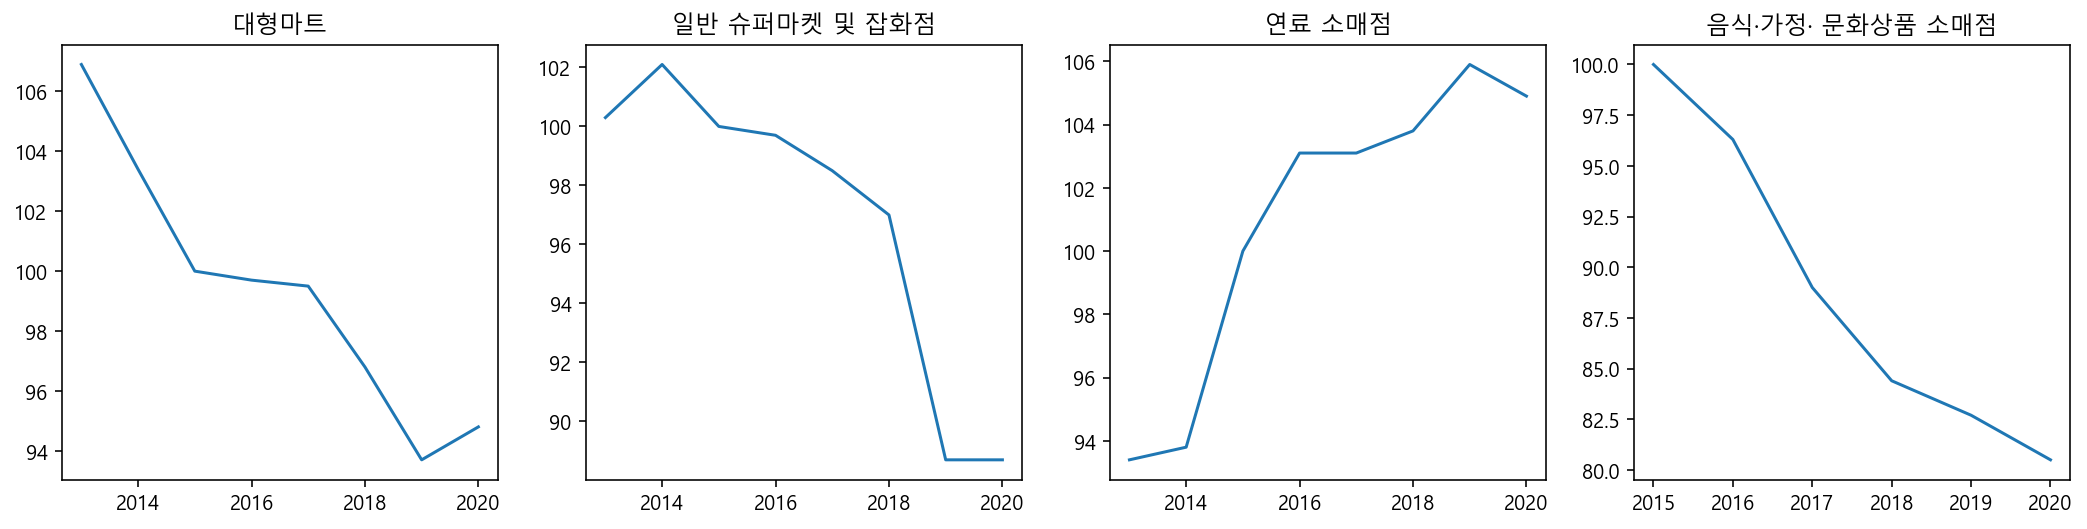

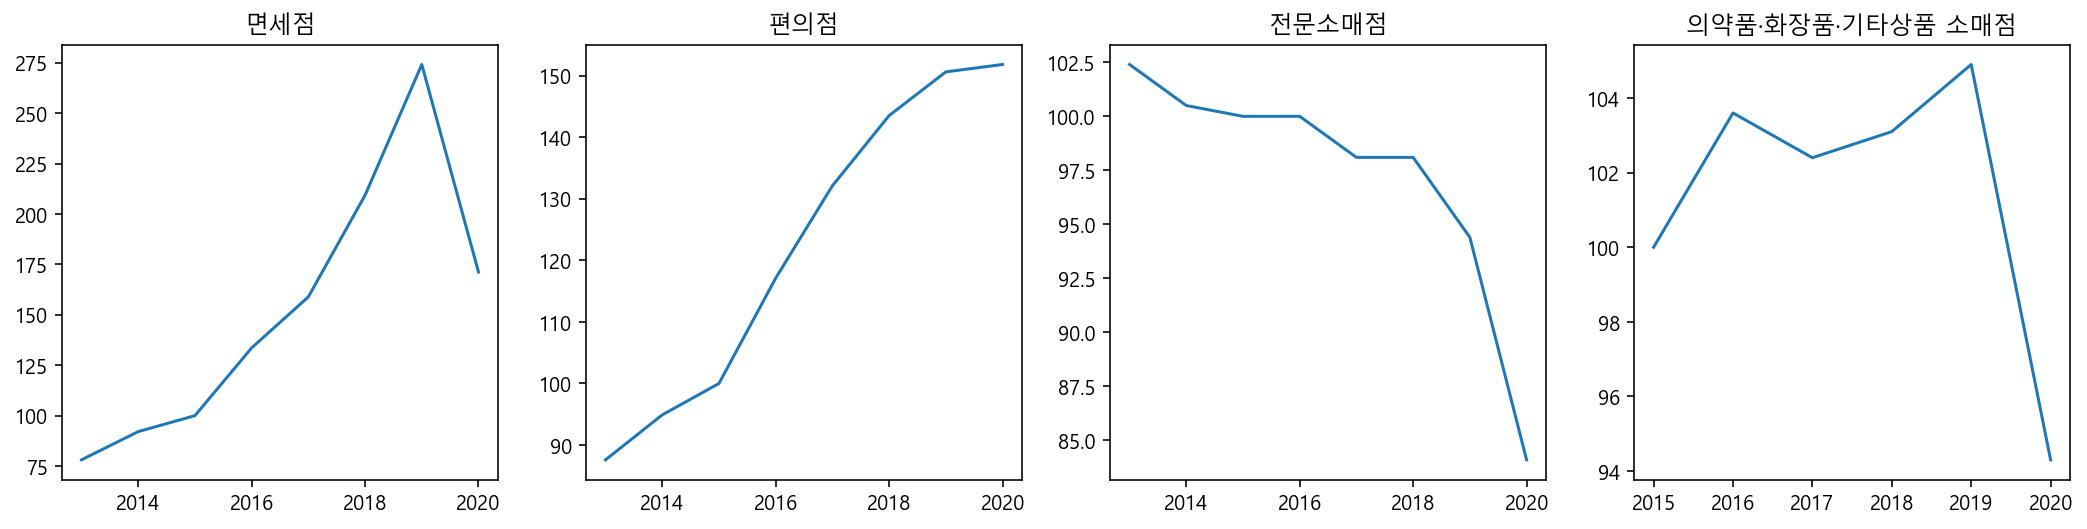

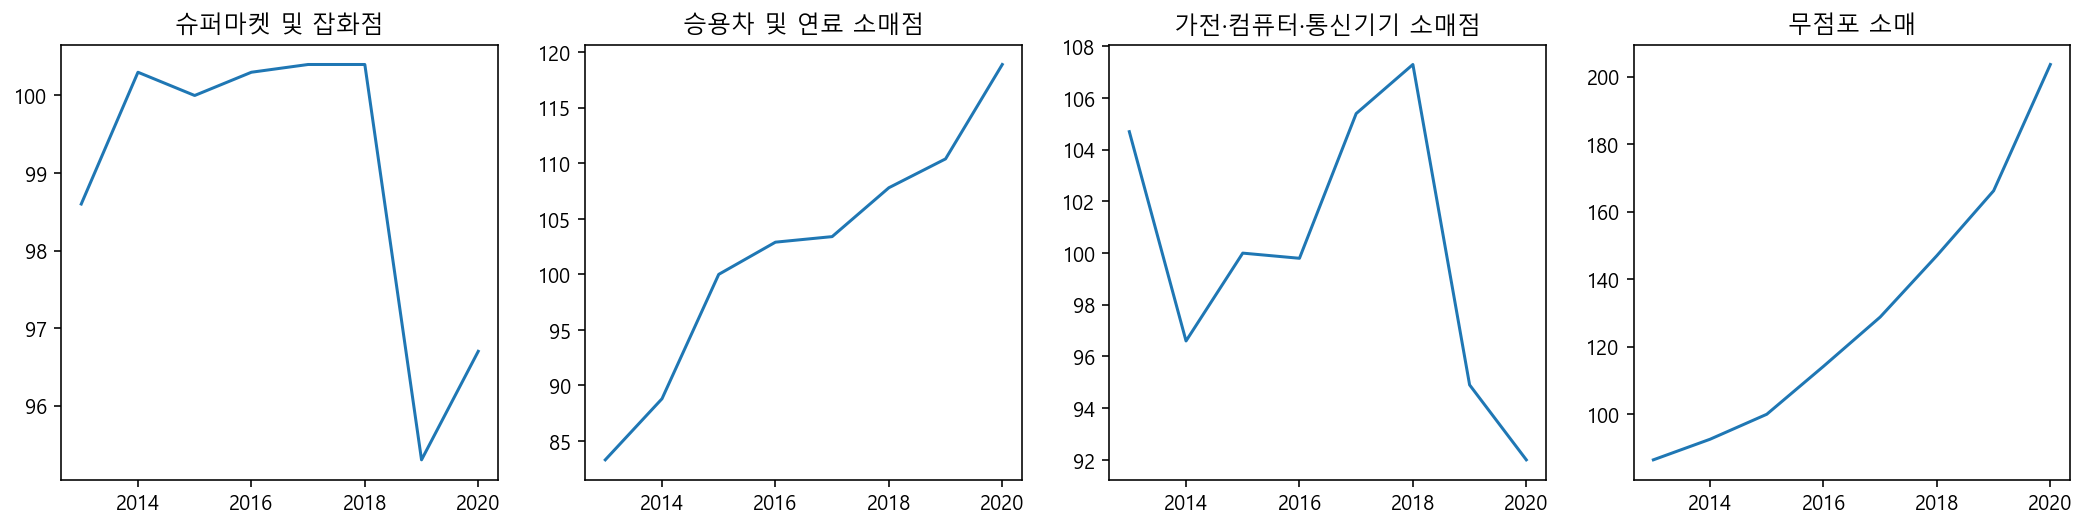

In [8]:
for x in range(5):
    ts_plot(df2,x)

### 유통 업태별 경상지수

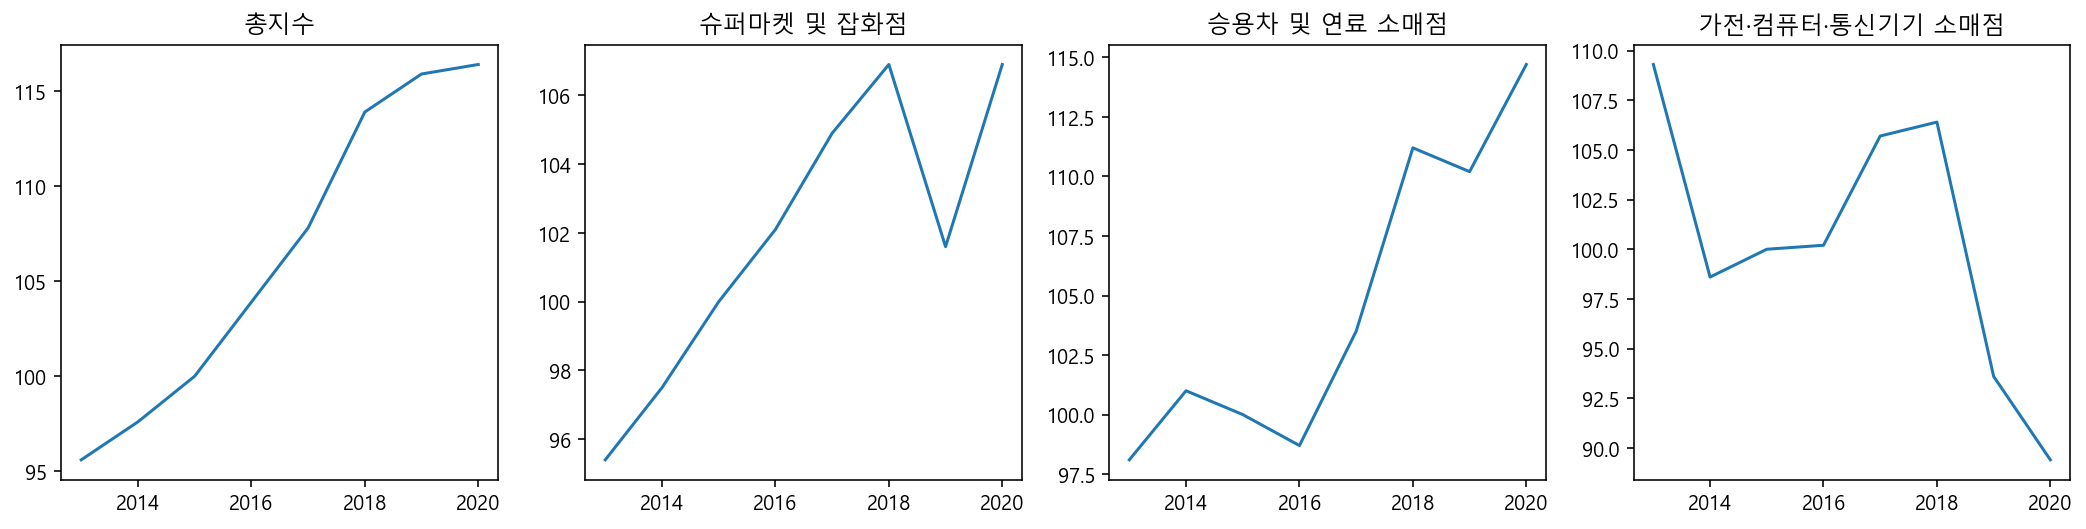

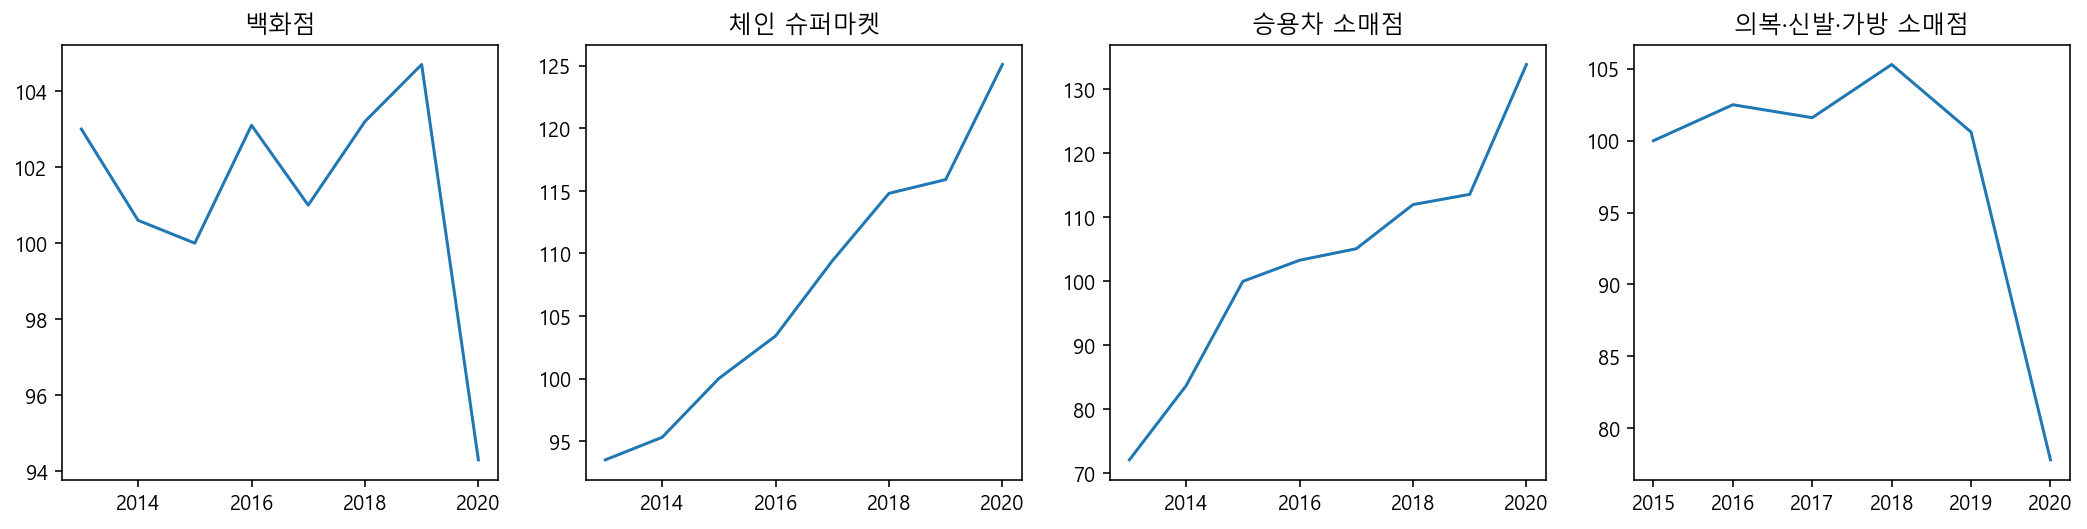

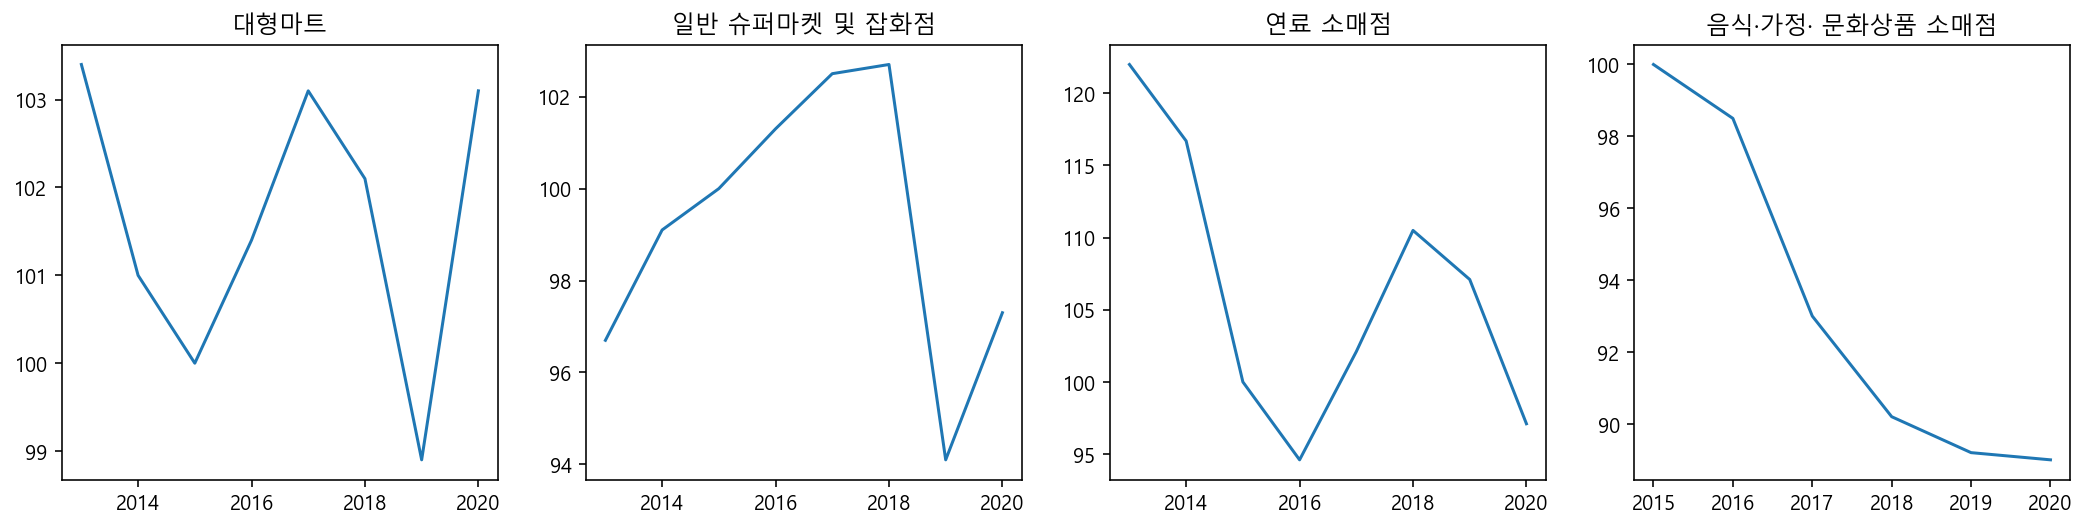

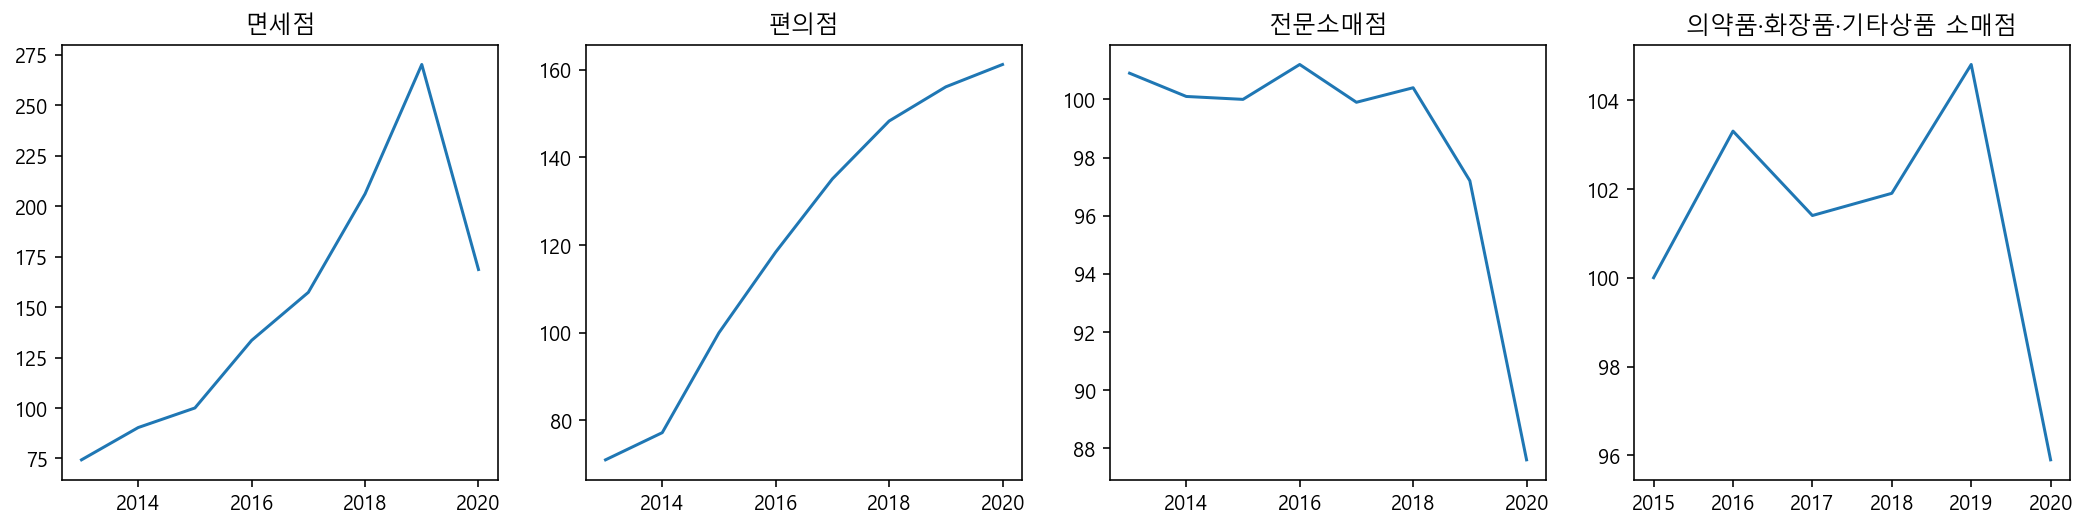

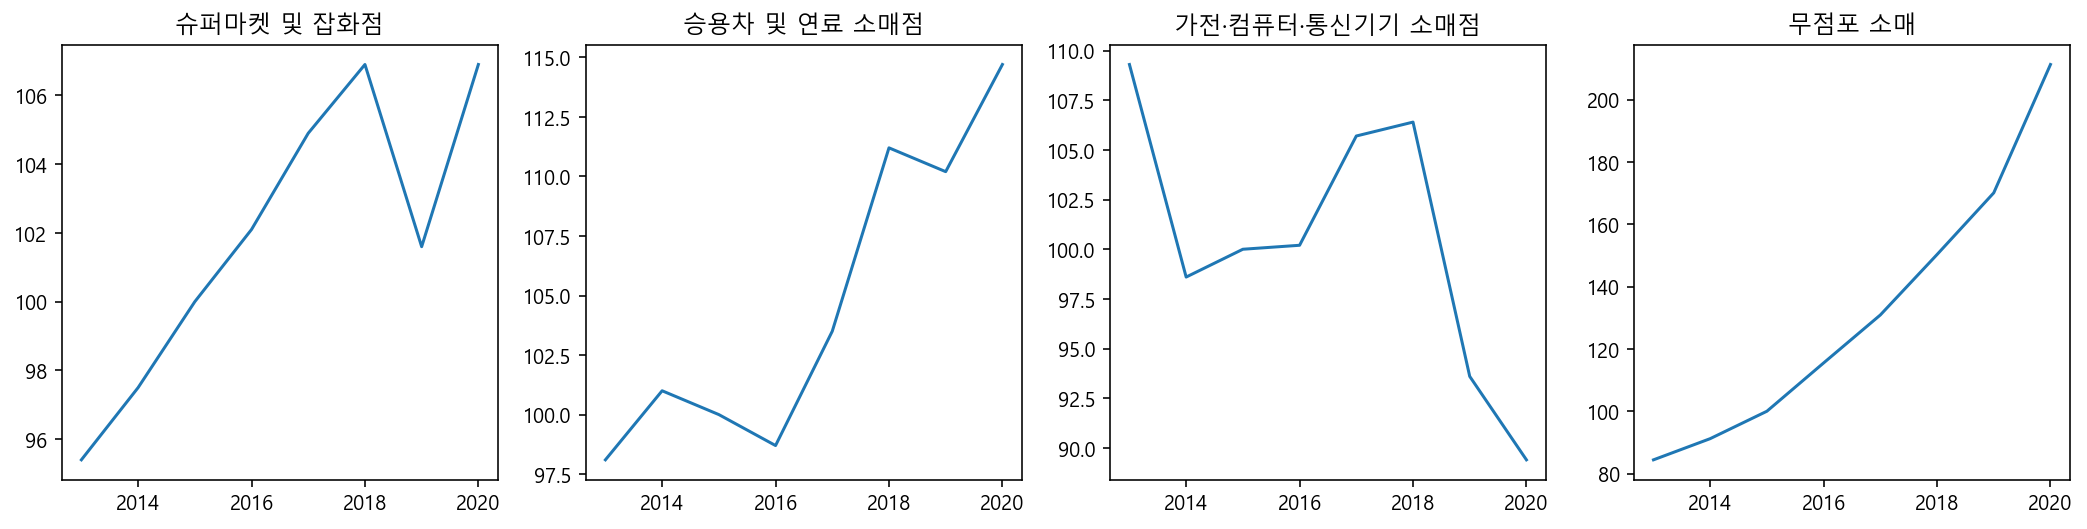

In [9]:
for x in range(5):
    ts_plot(df1,x)

### 전통시장 및 대형마트 빅3, 인터넷 쇼핑 상위 3위의 매출 추이

In [10]:
df3 = pd.read_csv('유형별 매출.csv',index_col='년도')

In [11]:
df3

,전통시장,이마트,롯데마트,홈플러스,이베이코리아유한책임회사,쿠팡,위메프,화폐가치
년도,,,,,,,,
2013,213898,110043,88365,70863,6622,478,746,0.980
2014,228183,109103,82091,73255,7339,3485,1258,0.993
2015,252743,110283,83237,70526,7994,11337,2165,1.000
2016,262351,113336,82007,67468,8634,19159,3691,1.010
2017,271241,116828,65774,66067,9519,26813,4730,1.029
2018,283715,115223,63423,66291,9811,43476,4234,1.044
2019,296512,110394,63307,64101,10954,71407,4653,1.048


In [12]:
# 화폐가치를 2015년도 기준으로 동일하게 처리
for x in range(7):
    df3.iloc[:,x]=df3.iloc[:,x]/df3.iloc[:,7]

In [13]:
df3

,전통시장,이마트,롯데마트,홈플러스,이베이코리아유한책임회사,쿠팡,위메프,화폐가치
년도,,,,,,,,
2013,218263.265306,112288.775510,90168.367347,72309.183673,6757.142857,487.755102,761.224490,0.980
2014,229791.540785,109872.104733,82669.687815,73771.399799,7390.735146,3509.566969,1266.868077,0.993
2015,252743.000000,110283.000000,83237.000000,70526.000000,7994.000000,11337.000000,2165.000000,1.000
2016,259753.465347,112213.861386,81195.049505,66800.000000,8548.514851,18969.306931,3654.455446,1.010
2017,263596.695821,113535.471331,63920.310982,64205.053450,9250.728863,26057.337221,4596.695821,1.029
2018,271757.662835,110366.858238,60750.000000,63497.126437,9397.509579,41643.678161,4055.555556,1.044
2019,282931.297710,105337.786260,60407.442748,61165.076336,10452.290076,68136.450382,4439.885496,1.048


In [14]:
def ts_plot2(data,i):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,4))
    ax[0].plot(data.iloc[:,i])
    ax[0].set_title(data.iloc[:,i].name)
    
    ax[1].plot(data.iloc[:,i+4])
    ax[1].set_title(data.iloc[:,i+4].name)

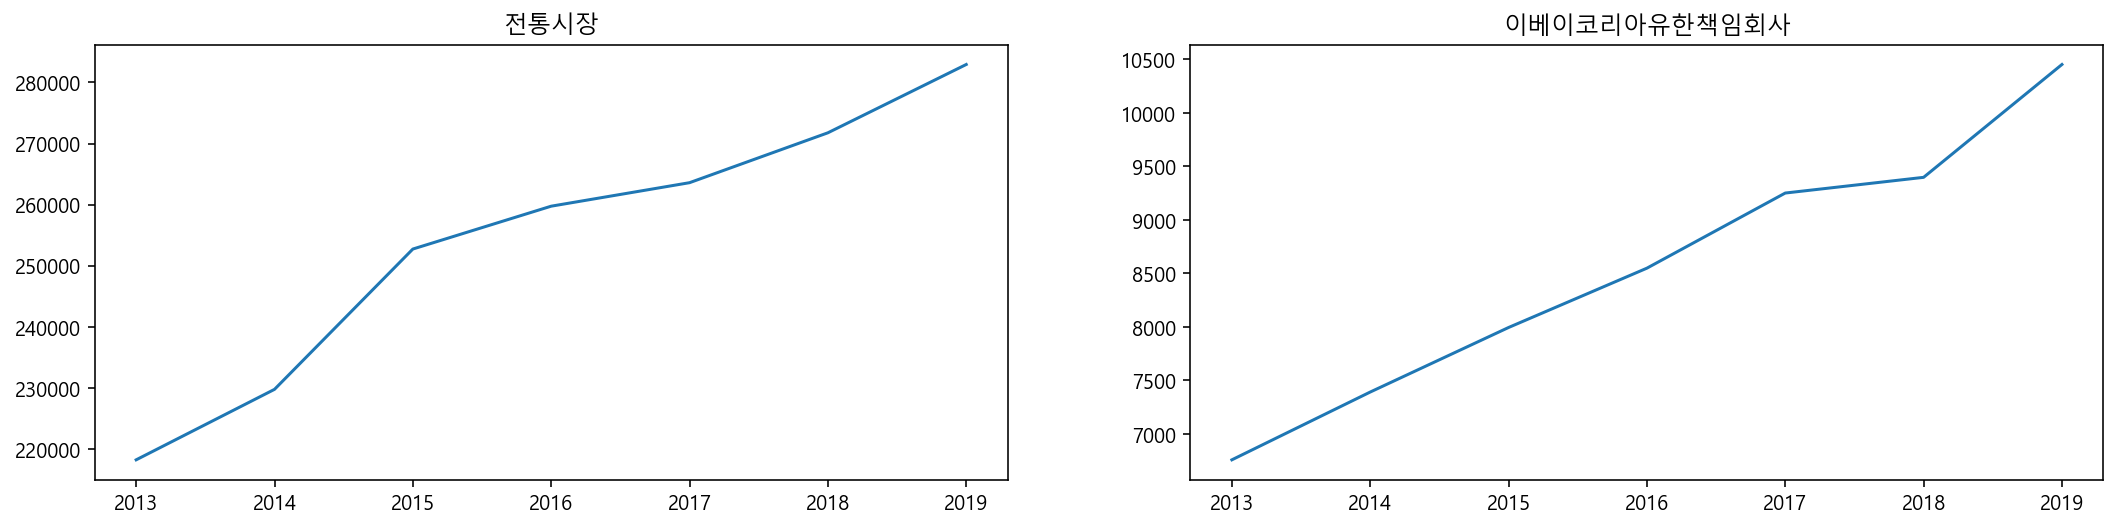

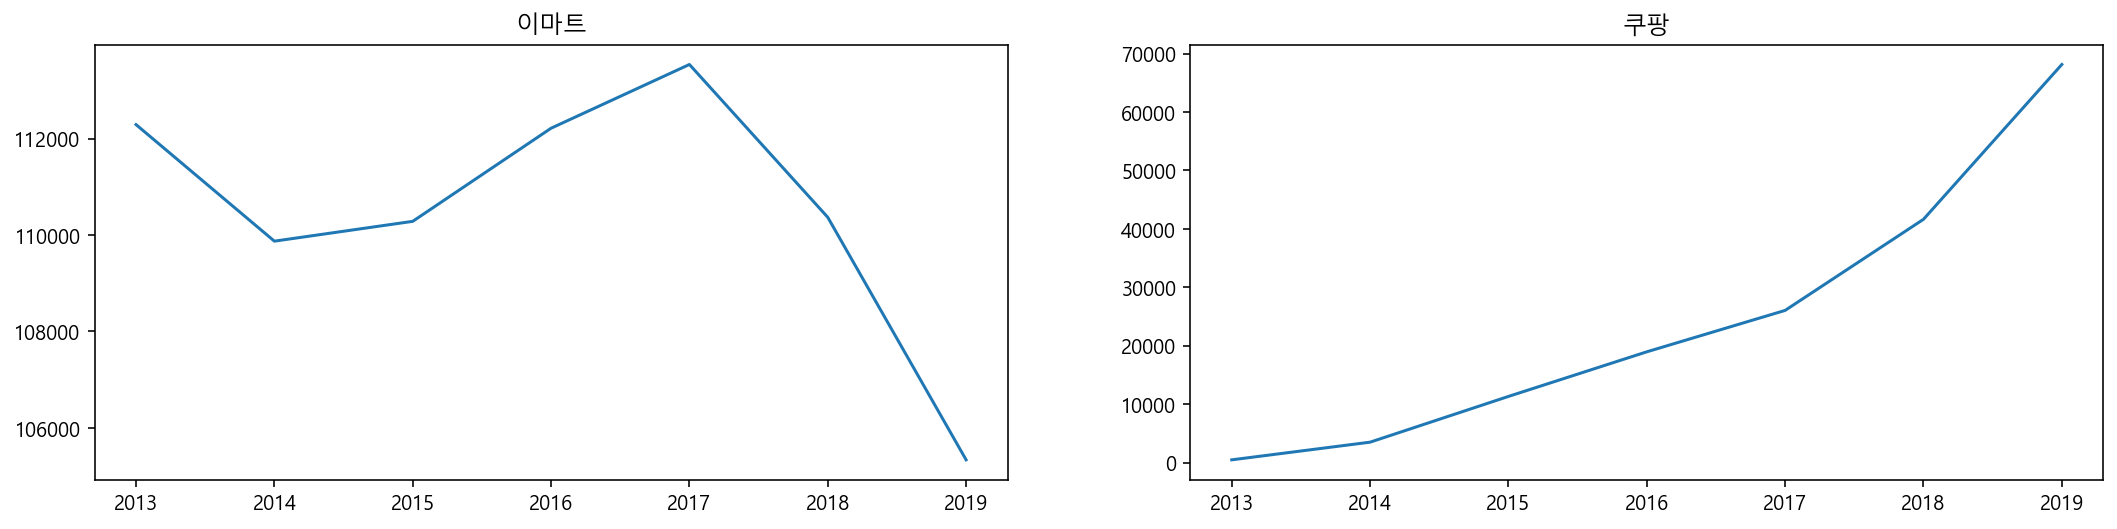

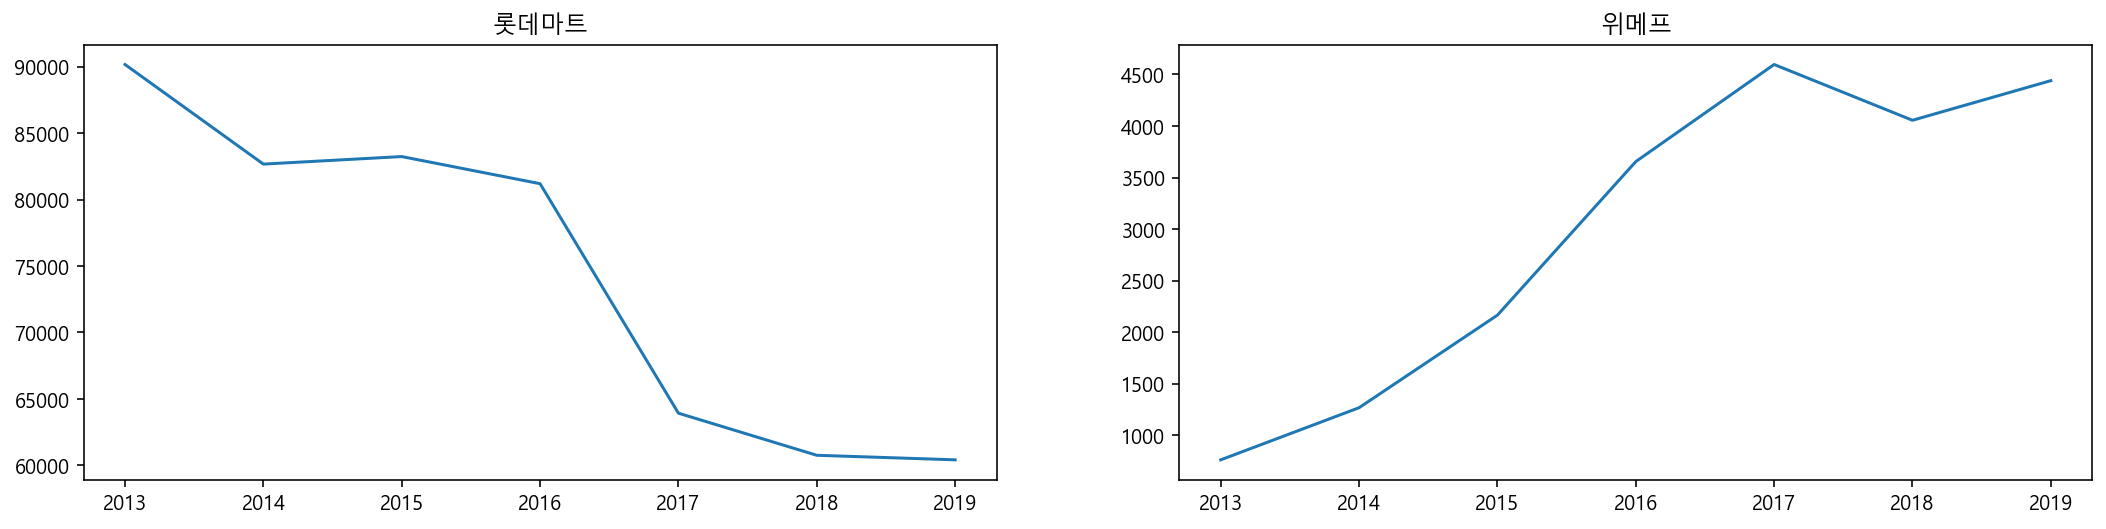

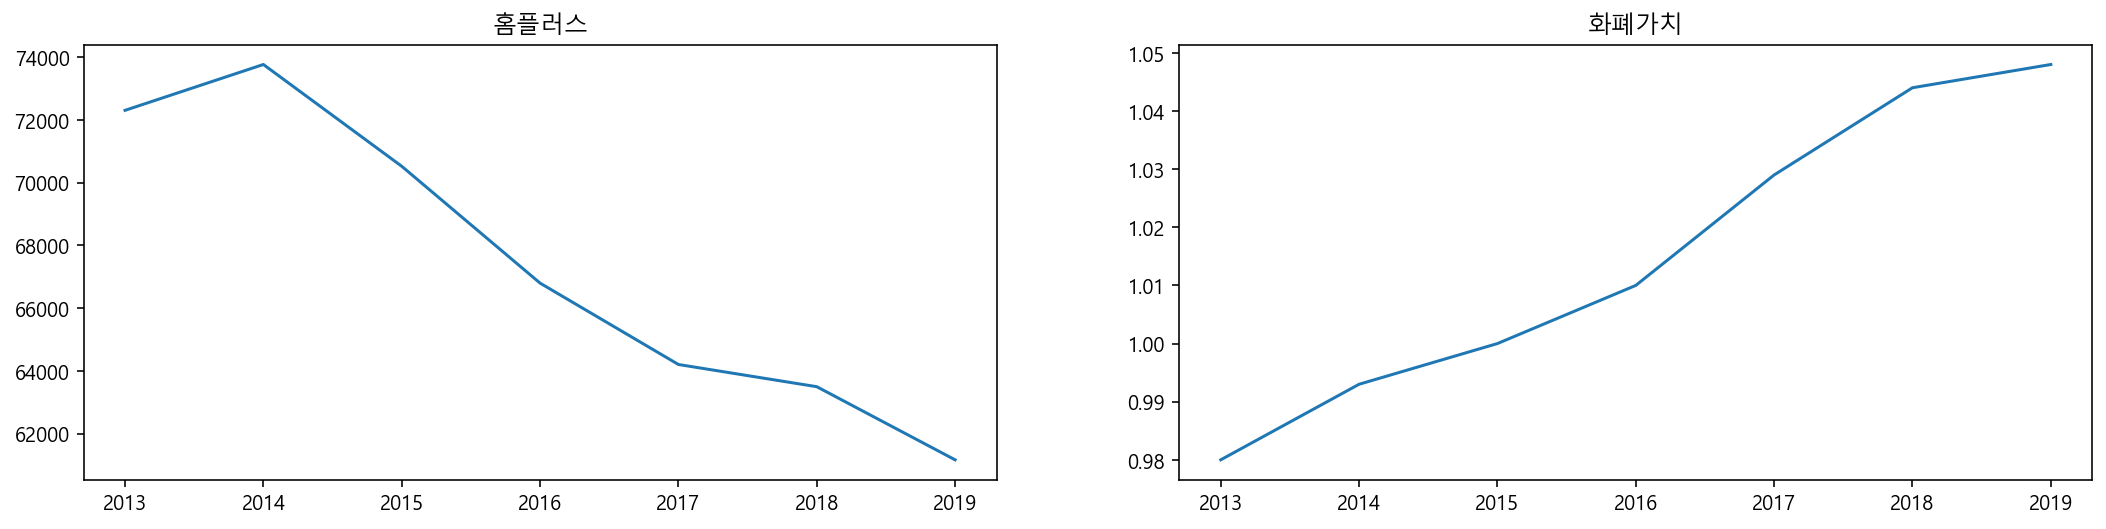

In [15]:
for x in range(4):
    ts_plot2(df3,x)

In [16]:
df3['대형마트']=df3.iloc[:,1]+df3.iloc[:,2]+df3.iloc[:,3]
# 대형마트 3사 2015기준 시장점유율 53%
df3['대형마트']=df3['대형마트']*1.8867


df3['온라인']=df3.iloc[:,4]+df3.iloc[:,5]+df3.iloc[:,6]
# 온라인 3사 2020기준 시장점유율 30%
df3['온라인']=df3['온라인']*3.3

In [17]:
df3['year']=df3.index

In [18]:
df3.iloc[:,[0,8,9]]

,전통시장,대형마트,온라인
년도,,,
2013,218263.265306,518401.628265,26420.204082
2014,229791.540785,502453.100000,40151.661631
2015,252743.000000,498175.588200,70936.800000
2016,259753.465347,490936.152178,102868.514851
2017,263596.695821,455941.498834,131685.714286
2018,271757.662835,442646.204885,181819.252874
2019,282931.297710,428111.673092,273994.465649


In [19]:
13.7+12.4+4.3

30.400000000000002

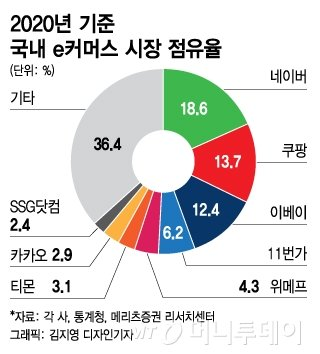
https://news.mt.co.kr/mtview.php?no=2021041915160413506

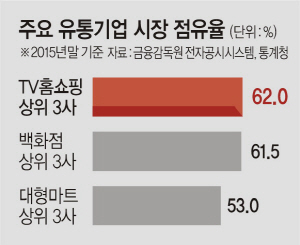
http://www.munhwa.com/news/view.html?no=2016122601072003016001

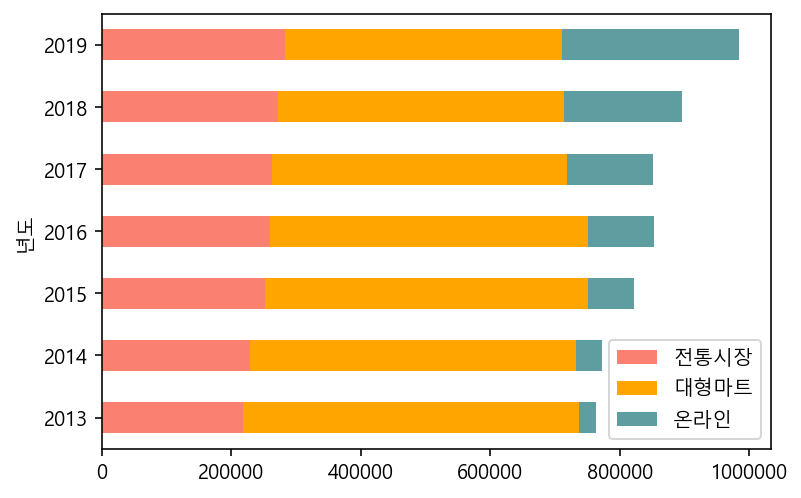

In [32]:
df3.iloc[:,[0,8,9]].plot.barh(stacked=True, color=['salmon', 'orange', 'cadetblue'])

대형마트는 감소추세, 온라인시장은 급격한 증가 추세

전통시장은 매출이 증가하고 있지만 2015년 이후 큰 증가 추세는 보이고 있지 않음

2020년 및 2021 코로나 19의 영항으로 사회적거리두기에 따라 대형마트를 운영하는 유통업계는 온라인 서비스사업에 더 많은 투자가 이루어지고 있지만 전통시장 이런 영향에 돌파구 마련이 쉽지않아 매출에 급격한 감소 및 큰 타격이 있을것으로 예상됨

# 전통시장 운영상황 분석

In [81]:
ma = pd.read_excel('시장상황.xlsx',index_col='년도')

In [82]:
ma

,전통시장 평균고객,종사자수,보증금,임대료,점포주연령,29세이하점포주,빈점포,점포수,기본시설,일평균매출,전통시장수,전체 소상공인 매출
년도,,,,,,,,,,,,
2013,3388.8,351240,2006.9,75.5,55.2,0.9,19599,210433,1502,4271.3,1502,0.000000
2014,3337.6,367692,2011.2,73.4,56.0,1.5,18873,209493,1536,4471.8,1536,0.000000
2015,4349.0,356176,2052.6,74.1,56.1,1.8,18821,207083,1439,4812.0,1439,0.000000
2016,4486.0,368930,2077.2,75.2,56.8,1.0,18807,209193,1441,4988.0,1441,0.000000
2017,4553.0,363660,2083.9,76.0,57.2,0.8,17504,209884,1450,5125.0,1450,878.938316
2018,5164.4,359049,1792.6,80.2,58.0,1.0,17587,205271,1437,5409.2,1437,876.756625
2019,5413.2,342031,1823.3,89.0,58.8,0.8,19818,207643,1413,5749.2,1413,856.971192


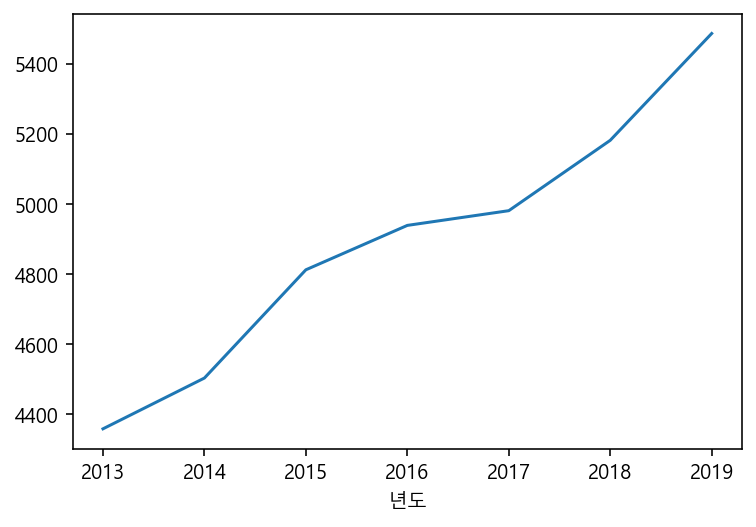

In [128]:
# 전통시장 매출추이

(ma['일평균매출']/df3['화폐가치']).plot()

전통시장 현대화 및 정책의 효과등으로 전통시장의 매출은 지속적으로 상승세를 보이고 있다.

In [123]:
(((ma['일평균매출']*30*ma['전통시장수'])/ma['종사자수']))/df3['화폐가치']

년도
2013    559.140846
2014    564.366742
2015    583.234244
2016    578.690476
2017    595.761203
2018    622.095188
2019    679.898496
dtype: float64

In [106]:
ma['전체 소상공인 매출']/df3['화폐가치']

년도
2013      0.000000
2014      0.000000
2015      0.000000
2016      0.000000
2017    854.167459
2018    839.805196
2019    817.720603
dtype: float64

In [124]:
(595.761203+622.095188+679.898496)/3

632.5849623333334

In [117]:
(854.167459+839.805196+817.720603)/3

837.2310860000001

([<matplotlib.patches.Wedge at 0x1f22b058748>,
 [Text(0.2386631114683845, 1.0737969636873768, '최근 3년간 평균 전통시장 매출'),
  Text(-0.23866301093225573, -1.0737969860326253, '최근 3년간 평균 소상공인 매출')],
 [Text(0.13017987898275518, 0.5857074347385691, '43.0%'),
  Text(-0.13017982414486673, -0.5857074469268865, '57.0%')])

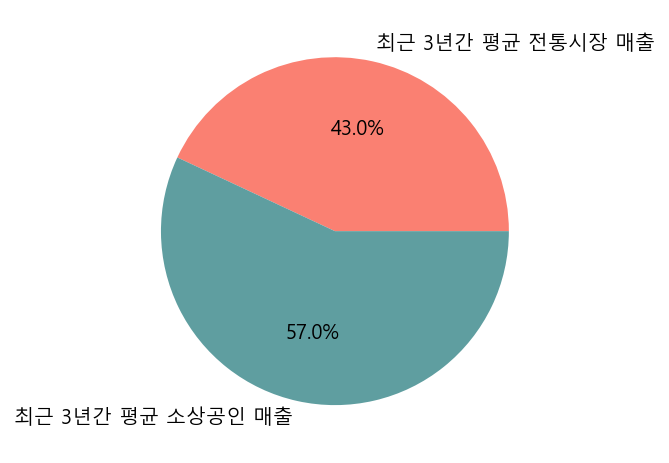

In [125]:
ratio=[632.5849623333334, 837.2310860000001]
labels=['최근 3년간 평균 전통시장 매출', '최근 3년간 평균 소상공인 매출']
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=['salmon', 'cadetblue'])

지속적인 전통시장의 매출 상승에도 불구하고 2017~2019년간 전체 소상공인 매출 대비 전통시장의 매출을 비교했을때 매출이 낮았다. 

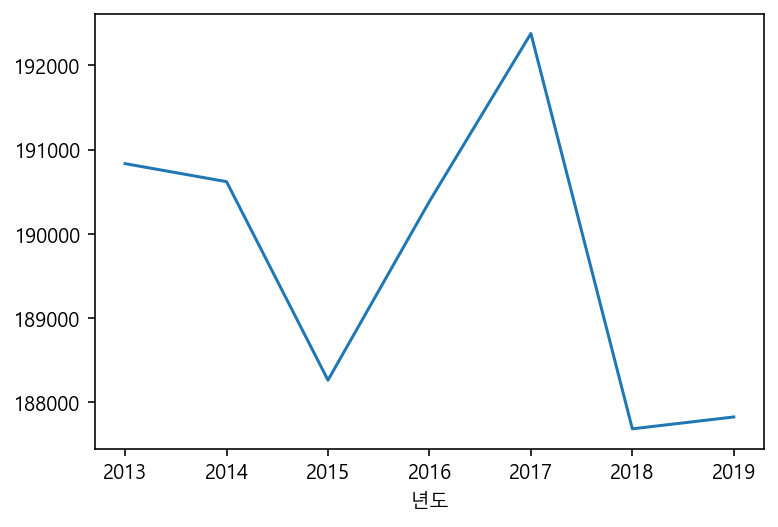

In [88]:
# 운영점포수 추이

(ma['점포수']-ma['빈점포']).plot()

전통시장의 운영점포수는 점점 낮아지고 있다.

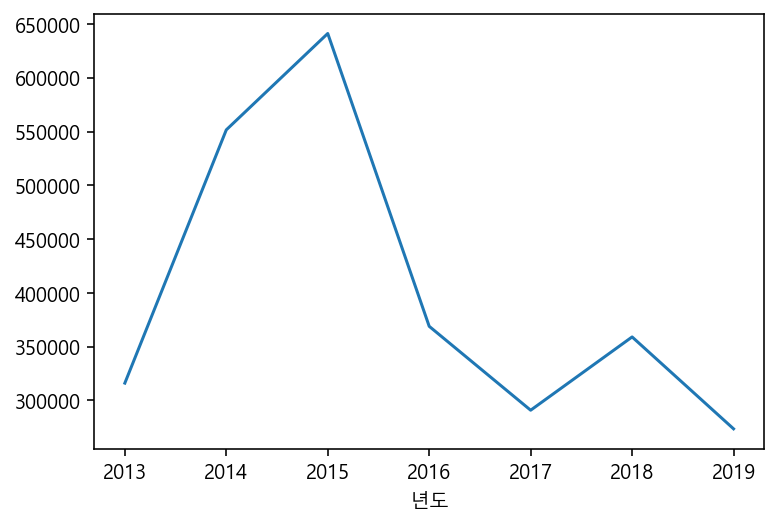

In [89]:
# 청년 종사자 추이

(ma['종사자수']*ma['29세이하점포주']).plot()

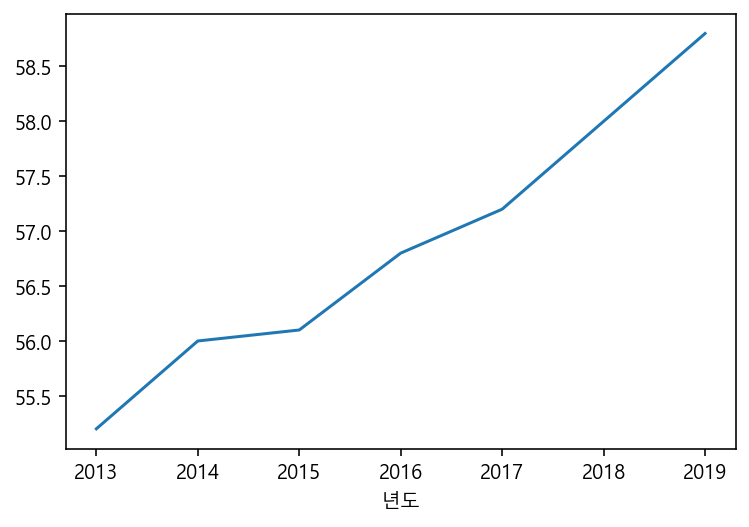

In [130]:
(ma['점포주연령']).plot()

In [129]:
ma.columns

Index(['전통시장 평균고객', '종사자수', '보증금', '임대료', '점포주연령', '29세이하점포주', '빈점포', '점포수',
       '기본시설', '일평균매출', '전통시장수', '전체 소상공인 매출'],
      dtype='object')

점포주 연령은 점점 높아지고 있으며 29세이하 종사자의 수는 급격히 낮아지고 있어 다른 산업군과의 정보 격차 및 시장의 세퇴가 우려된다.

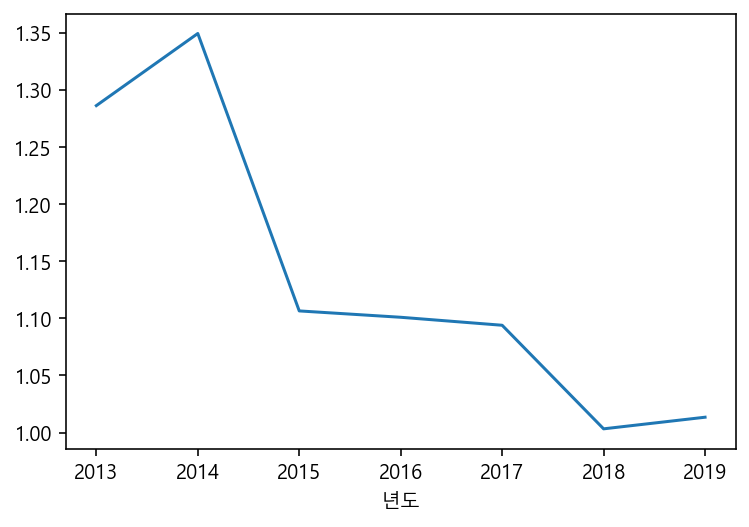

In [90]:
# 방문고객 소비액 추이

(ma['일평균매출']/ma['전통시장 평균고객']/df3['화폐가치']).plot()

또한 소비자는 대형마트, 이커머스시장의 확대로 인해 선택의 폭이 높아져 시장에서 사용하는 금액은 점차 줄어들고 있다.